In [1]:
# ========================================
# IMPORT LIBRARIES
# ========================================
import pandas as pd
pd.options.display.max_columns = None # Shows all columns
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True) # For notebook use
cf.go_offline() # For offline use

In [2]:
print(__version__) # requires version >= 1.9.0

3.4.1


In [18]:
# ========================================
# IMPORT DATAFRAME
# ========================================
df = pd.read_csv('data/df02.csv', sep=',', na_filter=False, index_col=0, parse_dates=['launched_at'])

In [23]:
df.shape

(173887, 218)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173887 entries, 0 to 173886
Columns: 218 entries, id to ZW
dtypes: datetime64[ns](1), float64(2), int64(213), object(2)
memory usage: 290.5+ MB


In [25]:
df.isnull().sum().sum()

0

In [26]:
sum(df.isna().sum())

0

In [174]:
# ========================================
# EXPLORATORY DATA ANALYSIS
# ========================================

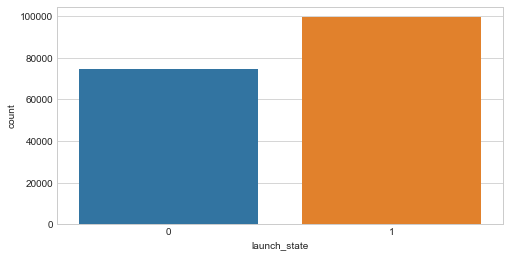

In [27]:
fig=plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.countplot(x='launch_state',data=df)

In [28]:
df00 = pd.read_csv('data/df00.csv')

In [10]:
df00.shape

(205696, 33)

In [29]:
df00['id'].unique().shape[0] # Find total unique projects

187074

In [30]:
df[df['launch_state'] == 1].values.shape[0]

99465

In [31]:
# There are 187074 total unique projects. What is the failed percentage from this data set?
df[df['launch_state'] == 1].values.shape[0] / df00['id'].unique().shape[0] * 100

53.168799512492384

In [170]:
# This shows that 53.2% of the total projects are considered 'successful'

In [33]:
df.columns[0:14]

Index(['id', 'launch_state', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'comics', 'crafts', 'dance', 'design'],
      dtype='object')

In [38]:
df.drop(df.columns[10:], axis=1).drop(columns=['id','launched_at','category','country']).columns

Index(['launch_state', 'goal', 'backers_count', 'pledged_ratio',
       'funding_days', 'staff_pick'],
      dtype='object')

C:\Users\steve\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\steve\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



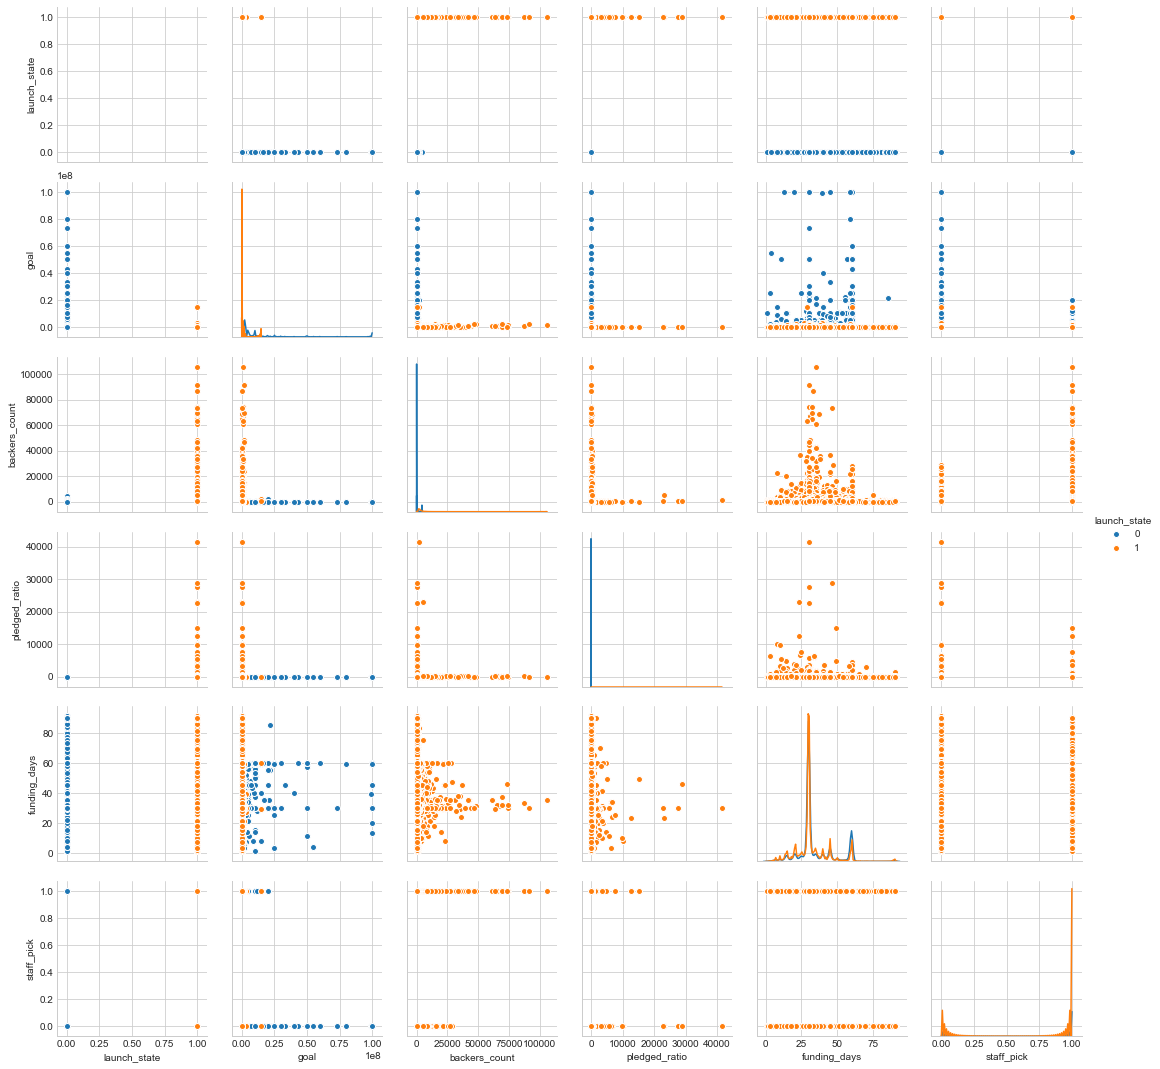

In [39]:
sns.set_style('whitegrid')
sns.pairplot(data=df.drop(df.columns[10:], axis=1).drop(columns=['id','launched_at','category','country']), 
             diag_kind='kde', hue='launch_state')

In [40]:
df.columns.values

array(['id', 'launch_state', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'comics', 'crafts', 'dance', 'design', 'fashion', 'film & video',
       'food', 'games', 'journalism', 'music', 'photography',
       'publishing', 'technology', 'theater', 'AF', 'AG', 'AL', 'AM',
       'AQ', 'AR', 'AT', 'AU', 'AX', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF',
       'BG', 'BH', 'BJ', 'BM', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ',
       'CA', 'CD', 'CG', 'CH', 'CI', 'CK', 'CL', 'CM', 'CN', 'CO', 'CR',
       'CU', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ',
       'EC', 'EE', 'EG', 'ES', 'ET', 'FI', 'FJ', 'FM', 'FO', 'FR', 'GA',
       'GB', 'GD', 'GE', 'GH', 'GL', 'GM', 'GN', 'GP', 'GQ', 'GR', 'GT',
       'GU', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN',
       'IQ', 'IR', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KN',
       'KP', 'KR', 'KW', 'KY', 'KZ', 'LA', 'LB', 'LC', 'LK', 'LR'

In [41]:
df.columns.shape

(218,)

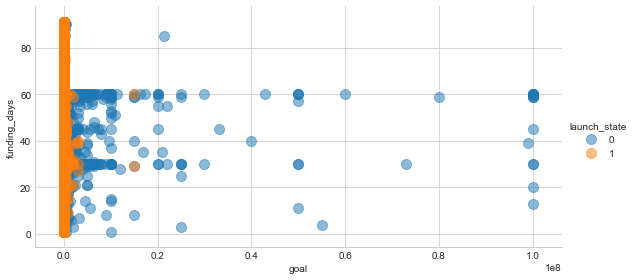

In [136]:
# funding_days vs goal
sns.set_style('whitegrid')
sns.lmplot("goal", "funding_days", data=df, hue='launch_state',
           fit_reg=False, scatter_kws={'alpha':0.5, 's':100}, size=4, aspect=2)

In [44]:
# It appears as if most of the huge goals fail

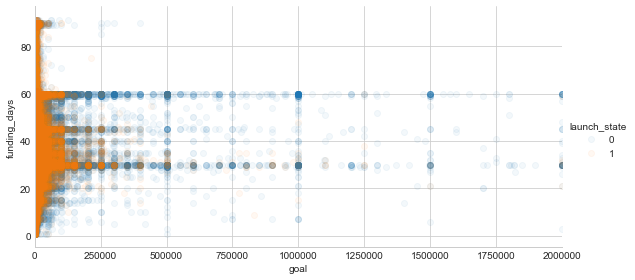

In [65]:
sns.set_style('whitegrid')
sns.lmplot("goal", "funding_days", data=df, hue='launch_state',
           fit_reg=False, scatter_kws={'alpha':0.05}, size=4, aspect=2).set(xlim=(0,0.2e7))

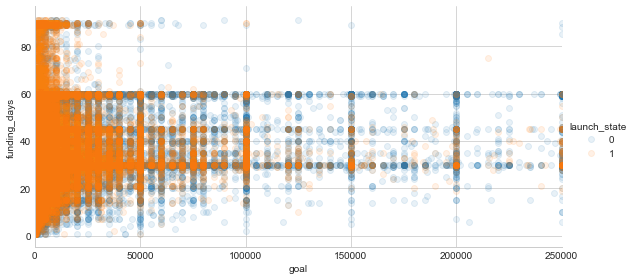

In [66]:
sns.set_style('whitegrid')
sns.lmplot("goal", "funding_days", data=df, hue='launch_state',
           fit_reg=False, scatter_kws={'alpha':0.1}, size=4, aspect=2).set(xlim=(0,250000))

In [ ]:
# There seems to be a better chance of success if the funding days and goal are both kept small

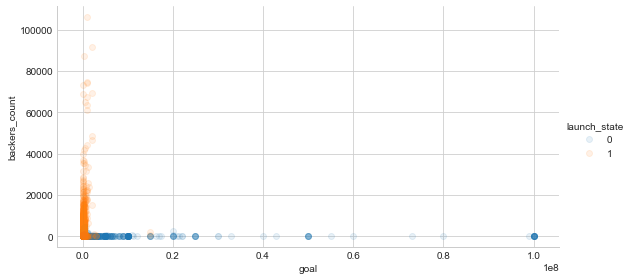

In [60]:
# backers_count vs goal
sns.set_style('whitegrid')
sns.lmplot("goal", "backers_count", data=df, hue='launch_state',
           fit_reg=False, scatter_kws={'alpha':0.1}, size=4, aspect=2)

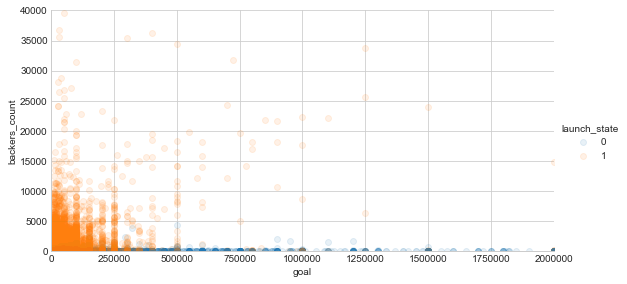

In [67]:
sns.set_style('whitegrid')
sns.lmplot("goal", "backers_count", data=df, hue='launch_state',
           fit_reg=False, scatter_kws={'alpha':0.1}, size=4, aspect=2).set(
    xlim=(0,0.2e7), ylim=(0,40000))

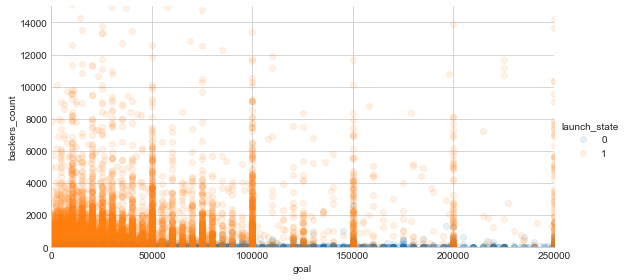

In [68]:
sns.set_style('whitegrid')
sns.lmplot("goal", "backers_count", data=df, hue='launch_state',
           fit_reg=False, scatter_kws={'alpha':0.1}, size=4, aspect=2).set(
    xlim=(0,250000), ylim=(0,15000))

In [69]:
# backers_count may not be a great indicator. It's obvious that if there 
# is a low number of backers then the project will more than likely fail. 
# Further, it's not a variable we can work with posteriori.

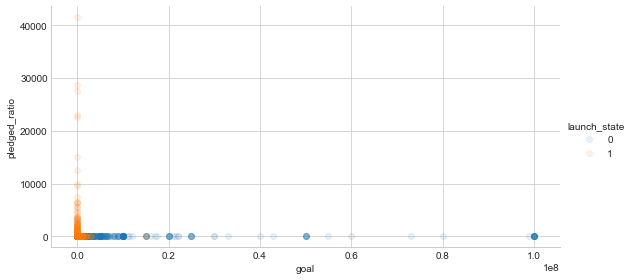

In [72]:
# pledged_ratio vs goal
sns.set_style('whitegrid')
sns.lmplot("goal", "pledged_ratio", data=df, hue='launch_state',
           fit_reg=False, scatter_kws={'alpha':0.1}, size=4, aspect=2)

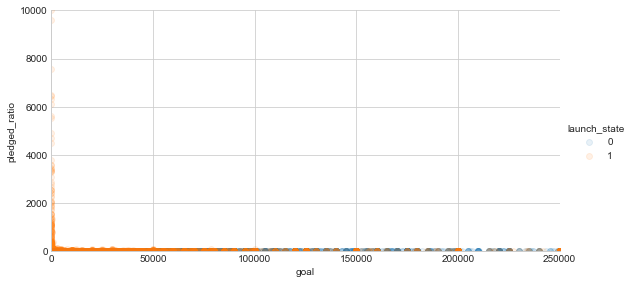

In [73]:
sns.set_style('whitegrid')
sns.lmplot("goal", "pledged_ratio", data=df, hue='launch_state',
           fit_reg=False, scatter_kws={'alpha':0.1}, size=4, aspect=2).set(
    xlim=(0,250000), ylim=(0,10000))

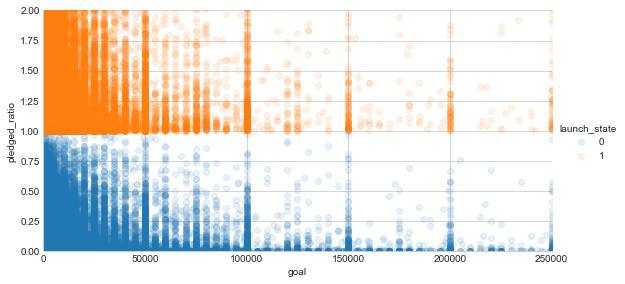

In [74]:
sns.set_style('whitegrid')
sns.lmplot("goal", "pledged_ratio", data=df, hue='launch_state',
           fit_reg=False, scatter_kws={'alpha':0.1}, size=4, aspect=2).set(
    xlim=(0,250000), ylim=(0,2))

In [ ]:
# Obviously a project is successful if it meets the goal
# and fails if it doesn't.

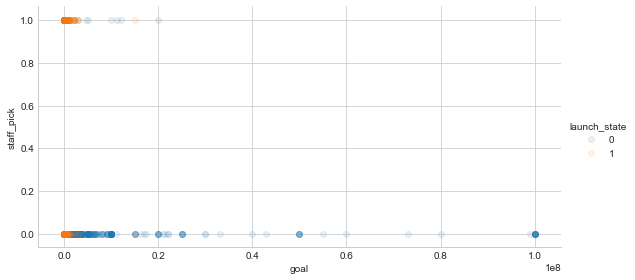

In [75]:
# staff_pick vs goal
sns.set_style('whitegrid')
sns.lmplot("goal", "staff_pick", data=df, hue='launch_state',
           fit_reg=False, scatter_kws={'alpha':0.1}, size=4, aspect=2)

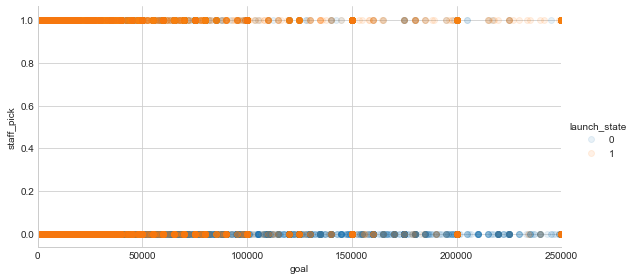

In [77]:
sns.set_style('whitegrid')
sns.lmplot("goal", "staff_pick", data=df, hue='launch_state',
           fit_reg=False, scatter_kws={'alpha':0.1}, size=4, aspect=2).set(
    xlim=(0,250000))

In [97]:
# launch_state vs staff_pick
df[['launch_state','staff_pick']].groupby(['staff_pick'], as_index=False).count()

staff_pick  launch_state
0           0        150608
1           1         23279

In [98]:
# Most projects do not get a staff pick

In [101]:
df[['launch_state','staff_pick']].groupby(['staff_pick'], as_index=False).mean()

staff_pick  launch_state
0           0      0.523073
1           1      0.888612

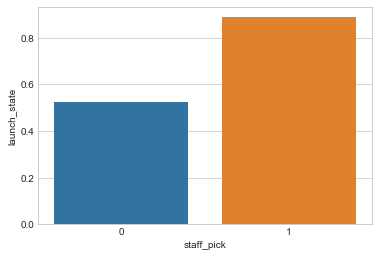

In [111]:
sns.barplot(data = df[['launch_state','staff_pick']].groupby(['staff_pick'], as_index=False).mean(), x='staff_pick', y='launch_state')

However, staff_pick does seem correlated with launch state
* 52% of projects without staff_pick succeed
* 89% of projects with staff_pick succeed

From https://www.kickstarter.com/blog/how-to-get-featured-on-kickstarter,
it appears as if projects are featured when they catch the eye of the
Kickstarter staff via creativity, a nice and visually appealing
site, etc. ie, they are NOT just picked due to them being funded well.

This is thus a good indicator - keep staff_pick!

In [112]:
df.drop(df.columns[10:], axis=1).drop(columns=['id','launched_at','category','country']).columns

Index(['launch_state', 'goal', 'backers_count', 'pledged_ratio',
       'funding_days', 'staff_pick'],
      dtype='object')

So what have we learned?
* goal - use it
* backers_count - do not use it (it's not known beforehand)
* pledged_ratio - do not use it (it's just an indicator of success)
* funding_days - use it
* staff_pick - use it

In [116]:
# Visualize categories

In [117]:
df.iloc[0:1,0:11]

id  launch_state         launched_at    category country    goal  \
0  895922629             0 2014-10-28 19:42:54  technology      US  3500.0   

   backers_count  pledged_ratio  funding_days  staff_pick  comics  
0              1       0.014286            30           0       0

In [115]:
df['launch_state'].unique()

array([0, 1], dtype=int64)

In [118]:
df_categories = df[['launch_state','category']].groupby(["category"]).describe().reset_index()
df_categories

category launch_state                                             
                        count      mean       std  min  25%  50%  75%  max
0            art      17521.0  0.553393  0.497155  0.0  0.0  1.0  1.0  1.0
1         comics       7663.0  0.817695  0.386121  0.0  1.0  1.0  1.0  1.0
2         crafts       5325.0  0.436056  0.495941  0.0  0.0  0.0  1.0  1.0
3          dance       3052.0  0.799148  0.400703  0.0  1.0  1.0  1.0  1.0
4         design       5756.0  0.626824  0.483690  0.0  0.0  1.0  1.0  1.0
5        fashion      10162.0  0.605688  0.488726  0.0  0.0  1.0  1.0  1.0
6   film & video      23477.0  0.584530  0.492813  0.0  0.0  1.0  1.0  1.0
7           food      14601.0  0.364564  0.481324  0.0  0.0  0.0  1.0  1.0
8          games      10837.0  0.609301  0.487929  0.0  0.0  1.0  1.0  1.0
9     journalism       4074.0  0.273687  0.445905  0.0  0.0  0.0  1.0  1.0
10         music      24156.0  0.668902  0.470618  0.0  0.0  1.0  1.0  1.0
11   photography       6564.0  0.505484  0.500008  0.0  0.0  1.0  1.0  1.0
12    publishing      16623.0  0.701438  0.457641  0.0  0.0  1.0  1.0  1.0
13    technology      17765.0  0.358964  0.479710  0.0  0.0  0.0  1.0  1.0
14       theater       6311.0  0.745048  0.435869  0.0  0.0  1.0  1.0  1.0

In [119]:
df_categories.sort_values(by=[('launch_state','mean')], ascending=False)

category launch_state                                             
                        count      mean       std  min  25%  50%  75%  max
1         comics       7663.0  0.817695  0.386121  0.0  1.0  1.0  1.0  1.0
3          dance       3052.0  0.799148  0.400703  0.0  1.0  1.0  1.0  1.0
14       theater       6311.0  0.745048  0.435869  0.0  0.0  1.0  1.0  1.0
12    publishing      16623.0  0.701438  0.457641  0.0  0.0  1.0  1.0  1.0
10         music      24156.0  0.668902  0.470618  0.0  0.0  1.0  1.0  1.0
4         design       5756.0  0.626824  0.483690  0.0  0.0  1.0  1.0  1.0
8          games      10837.0  0.609301  0.487929  0.0  0.0  1.0  1.0  1.0
5        fashion      10162.0  0.605688  0.488726  0.0  0.0  1.0  1.0  1.0
6   film & video      23477.0  0.584530  0.492813  0.0  0.0  1.0  1.0  1.0
0            art      17521.0  0.553393  0.497155  0.0  0.0  1.0  1.0  1.0
11   photography       6564.0  0.505484  0.500008  0.0  0.0  1.0  1.0  1.0
2         crafts       5325.0  0.436056  0.495941  0.0  0.0  0.0  1.0  1.0
7           food      14601.0  0.364564  0.481324  0.0  0.0  0.0  1.0  1.0
13    technology      17765.0  0.358964  0.479710  0.0  0.0  0.0  1.0  1.0
9     journalism       4074.0  0.273687  0.445905  0.0  0.0  0.0  1.0  1.0

In [120]:
df_categories.iloc[:,[0,2]]

category launch_state
                         mean
0            art     0.553393
1         comics     0.817695
2         crafts     0.436056
3          dance     0.799148
4         design     0.626824
5        fashion     0.605688
6   film & video     0.584530
7           food     0.364564
8          games     0.609301
9     journalism     0.273687
10         music     0.668902
11   photography     0.505484
12    publishing     0.701438
13    technology     0.358964
14       theater     0.745048

In [145]:
df.groupby('category', as_index=False).sum()

category              id  launch_state          goal  backers_count  \
0            art  18880024491441          9696  3.069905e+08         922216   
1         comics   8102982701483          6266  6.413380e+07        1472184   
2         crafts   5738133210008          2322  6.003472e+07         233630   
3          dance   3296114587481          2439  2.284288e+07         159127   
4         design   6221641960414          3608  3.716657e+08        1834099   
5        fashion  10865426177788          6155  1.758324e+08        1331276   
6   film & video  25178405891633         13723  2.700358e+09        2339342   
7           food  15735284138249          5323  7.128655e+08         988642   
8          games  11669394499108          6603  4.500805e+08        5756589   
9     journalism   4388373146016          1115  2.498581e+08         204863   
10         music  26007660017506         16158  2.392330e+08        1559937   
11   photography   7050316065740          3318  8.268153e+07         378869   
12    publishing  17996586772497         11660  1.925976e+08        1848630   
13    technology  19092718578996          6377  1.709762e+09        4736060   
14       theater   6676277407383          4702  1.768165e+08         321782   

    pledged_ratio  funding_days  staff_pick  comics  crafts  dance  design  \
0    63896.101743        561337        2140       0       0      0       0   
1    77514.400681        246025        2101    7663       0      0       0   
2    22013.846001        163966         493       0    5325      0       0   
3     3063.451069         96938         649       0       0   3052       0   
4    19173.905578        189166         912       0       0      0    5756   
5    23990.659481        318939        1041       0       0      0       0   
6    90722.990939        811691        3097       0       0      0       0   
7    11800.174856        489623        1750       0       0      0       0   
8    84323.149859        348479        1807       0       0      0       0   
9     2520.806269        138266         392       0       0      0       0   
10   54964.559196        843969        1870       0       0      0       0   
11    6227.244441        213367        1026       0       0      0       0   
12   70178.997163        541180        3082       0       0      0       0   
13   73998.680245        619785        2153       0       0      0       0   
14    8414.799130        205282         766       0       0      0       0   

    fashion  film & video   food  games  journalism  music  photography  \
0         0             0      0      0           0      0            0   
1         0             0      0      0           0      0            0   
2         0             0      0      0           0      0            0   
3         0             0      0      0           0      0            0   
4         0             0      0      0           0      0            0   
5     10162             0      0      0           0      0            0   
6         0         23477      0      0           0      0            0   
7         0             0  14601      0           0      0            0   
8         0             0      0  10837           0      0            0   
9         0             0      0      0        4074      0            0   
10        0             0      0      0           0  24156            0   
11        0             0      0      0           0      0         6564   
12        0             0      0      0           0      0            0   
13        0             0      0      0           0      0            0   
14        0             0      0      0           0      0            0   

    publishing  technology  theater  AF  AG  AL  AM  AQ  AR  AT   AU  AX  AZ  \
0            0           0        0   1   1   0   0   2  23  18  198   1   0   
1            0           0        0   0   0   0   0   0   1   7  150   0   0   
2            0           0        0   0   0   0   1  

In [147]:
df.groupby('category', as_index=False).count()

category     id  launch_state  launched_at  country   goal  \
0            art  17521         17521        17521    17521  17521   
1         comics   7663          7663         7663     7663   7663   
2         crafts   5325          5325         5325     5325   5325   
3          dance   3052          3052         3052     3052   3052   
4         design   5756          5756         5756     5756   5756   
5        fashion  10162         10162        10162    10162  10162   
6   film & video  23477         23477        23477    23477  23477   
7           food  14601         14601        14601    14601  14601   
8          games  10837         10837        10837    10837  10837   
9     journalism   4074          4074         4074     4074   4074   
10         music  24156         24156        24156    24156  24156   
11   photography   6564          6564         6564     6564   6564   
12    publishing  16623         16623        16623    16623  16623   
13    technology  17765         17765        17765    17765  17765   
14       theater   6311          6311         6311     6311   6311   

    backers_count  pledged_ratio  funding_days  staff_pick  comics  crafts  \
0           17521          17521         17521       17521   17521   17521   
1            7663           7663          7663        7663    7663    7663   
2            5325           5325          5325        5325    5325    5325   
3            3052           3052          3052        3052    3052    3052   
4            5756           5756          5756        5756    5756    5756   
5           10162          10162         10162       10162   10162   10162   
6           23477          23477         23477       23477   23477   23477   
7           14601          14601         14601       14601   14601   14601   
8           10837          10837         10837       10837   10837   10837   
9            4074           4074          4074        4074    4074    4074   
10          24156          24156         24156       24156   24156   24156   
11           6564           6564          6564        6564    6564    6564   
12          16623          16623         16623       16623   16623   16623   
13          17765          17765         17765       17765   17765   17765   
14           6311           6311          6311        6311    6311    6311   

    dance  design  fashion  film & video   food  games  journalism  music  \
0   17521   17521    17521         17521  17521  17521       17521  17521   
1    7663    7663     7663          7663   7663   7663        7663   7663   
2    5325    5325     5325          5325   5325   5325        5325   5325   
3    3052    3052     3052          3052   3052   3052        3052   3052   
4    5756    5756     5756          5756   5756   5756        5756   5756   
5   10162   10162    10162         10162  10162  10162       10162  10162   
6   23477   23477    23477         23477  23477  23477       23477  23477   
7   14601   14601    14601         14601  14601  14601       14601  14601   
8   10837   10837    10837         10837  10837  10837       10837  10837   
9    4074    4074     4074          4074   4074   4074        4074   4074   
10  24156   24156    24156         24156  24156  24156       24156  24156   
11   6564    6564     6564          6564   6564   6564        6564   6564   
12  16623   16623    16623         16623  16623  16623       16623  16623   
13  17765   17765    17765         17765  17765  17765       17765  17765   
14   6311    6311     6311          6311   6311   6311        6311   6311   

    photography  publishing  technology  theater     AF     AG     AL     AM  \
0         17521       17521       17521    17521  17521  17521  17521  17521   
1          7663        7663        7663     7663   7663   7663   7663   7663   
2          5325        5325        5325     5325   5325   5325   5325   5325   
3          3052        3052        3052     3052   3052   3052   3052   3052   
4    

In [148]:
# dance success check
2439/3052

0.7991480996068152

In [121]:
df_categories[('launch_state','mean')]

0     0.553393
1     0.817695
2     0.436056
3     0.799148
4     0.626824
5     0.605688
6     0.584530
7     0.364564
8     0.609301
9     0.273687
10    0.668902
11    0.505484
12    0.701438
13    0.358964
14    0.745048
Name: (launch_state, mean), dtype: float64

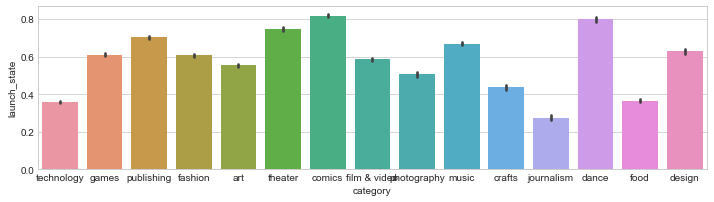

In [237]:
plt.figure(figsize=(12,3))
sns.barplot(x='category',y='launch_state',data=df)

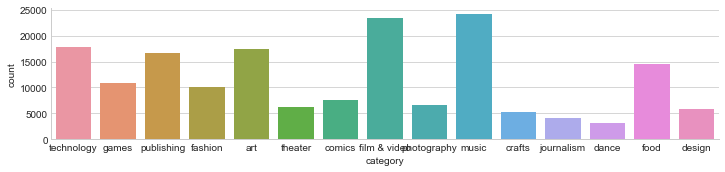

In [123]:
sns.factorplot(x='category', data=df, kind='count', size=2.5, aspect=4)

In [337]:
df.pivot_table(values='launch_state', columns='category', index='goal', fill_value=0.5)

category           art  comics    crafts  dance    design  fashion  \
goal                                                                 
1.000000e-02  1.000000     0.5  0.500000    0.5  0.500000     0.50   
1.000000e+00  0.838710     1.0  0.833333    0.5  1.000000     1.00   
2.000000e+00  1.000000     1.0  1.000000    0.5  1.000000     0.50   
3.000000e+00  1.000000     1.0  0.500000    0.5  0.500000     0.50   
4.000000e+00  1.000000     0.5  1.000000    0.5  1.000000     0.50   
5.000000e+00  0.857143     1.0  1.000000    1.0  1.000000     0.50   
6.000000e+00  1.000000     0.5  0.500000    0.5  0.500000     0.50   
7.000000e+00  1.000000     0.5  0.500000    1.0  0.500000     0.50   
8.000000e+00  1.000000     1.0  1.000000    0.5  0.500000     0.50   
9.000000e+00  0.500000     0.5  0.500000    0.5  0.500000     0.50   
1.000000e+01  0.675000     1.0  0.842105    0.5  1.000000     0.80   
1.100000e+01  0.500000     0.5  0.500000    0.5  0.000000     1.00   
1.200000e+01  0.571429     1.0  0.500000    0.5  0.500000     0.50   
1.300000e+01  0.500000     1.0  0.500000    0.5  1.000000     1.00   
1.400000e+01  1.000000     0.5  0.500000    0.5  1.000000     1.00   
1.500000e+01  0.571429     1.0  1.000000    0.5  1.000000     1.00   
1.600000e+01  1.000000     0.5  0.500000    0.5  0.500000     0.50   
1.700000e+01  0.500000     0.5  0.500000    0.5  0.500000     1.00   
1.800000e+01  0.500000     1.0  1.000000    0.5  0.500000     1.00   
1.900000e+01  0.500000     1.0  0.500000    0.5  0.500000     0.50   
2.000000e+01  0.771429     1.0  0.846154    0.5  0.750000     0.75   
2.010000e+01  0.500000     0.5  0.500000    0.5  0.500000     0.50   
2.100000e+01  0.500000     0.5  0.500000    0.5  0.500000     0.50   
2.200000e+01  1.000000     0.5  1.000000    0.5  0.500000     1.00   
2.300000e+01  0.500000     1.0  0.500000    0.5  0.500000     0.50   
2.400000e+01  0.500000     1.0  0.500000    0.5  0.500000     1.00   
2.500000e+01  0.851852     1.0  0.800000    0.5  0.882353     0.80   
2.600000e+01  0.500000     0.5  0.500000    0.5  0.500000     0.50   
2.700000e+01  1.000000     0.5  1.000000    0.5  0.000000     0.50   
2.800000e+01  0.500000     0.5  1.000000    0.5  1.000000     1.00   
...                ...     ...       ...    ...       ...      ...   
7.500000e+06  0.500000     0.5  0.500000    0.5  0.500000     0.50   
8.000000e+06  0.500000     0.5  0.500000    0.5  0.000000     0.50   
8.450000e+06  0.500000     0.5  0.500000    0.5  0.500000     0.50   
8.999999e+06  0.500000     0.5  0.500000    0.5  0.500000     0.50   
9.000000e+06  0.500000     0.5  0.500000    0.5  0.500000     0.00   
9.554000e+06  0.500000     0.5  0.500000    0.5  0.500000     0.50   
1.000000e+07  0.000000     0.5  0.000000    0.5  0.000000     0.50   
1.100000e+07  0.500000     0.5  0.500000    0.5  0.500000     0.50   
1.125000e+07  0.500000     0.5  0.500000    0.5  0.500000     0.50   
1.200000e+07  0.500000     0.5  0.500000    0.5  0.500000     0.50   
1.500000e+07  0.500000     0.5  0.500000    0.5  0.500000     0.00   
1.625000e+07  0.500000     0.5  0.500000    0.5  0.000000     0.50   
1.700000e+07  0.500000     0.5  0.500000    0.5  0.500000     0.50   
1.740000e+07  0.500000     0.5  0.500000    0.5  0.500000     0.50   
2.000000e+07  0.500000     0.5  0.500000    0.5  0.500000     0.50   
2.100000e+07  0.500000     0.5  0.500000    0.5  0.500000     0.50   
2.147484e+07  0.500000     0.5  0.500000    0.5  0.500000     0.50   
2.200000e+07  0.500000     0.5  0.500000    0.5  0.500000     0.50   
2.500000e+07  0.000000     0.5  0.500000    0.5  0.000000     0.50   
3.000000e+07  0.500000     0.5  0.500000    0.5  0.500000     0.50   
3.300000e+07  0.500000     0.5  0.500000    0.5  0.500000     0.50   
4.000000e+07  0.500000     0.5  0.500000    0.5  0.500000     0.50   
4.290000e+07  0.500000     0.5  0.500000    0.5  0.000000     0.50   
5.000000e+07  0.000000     0.5  0.500000    0.5  0.500000     0.50   
5.500000e+

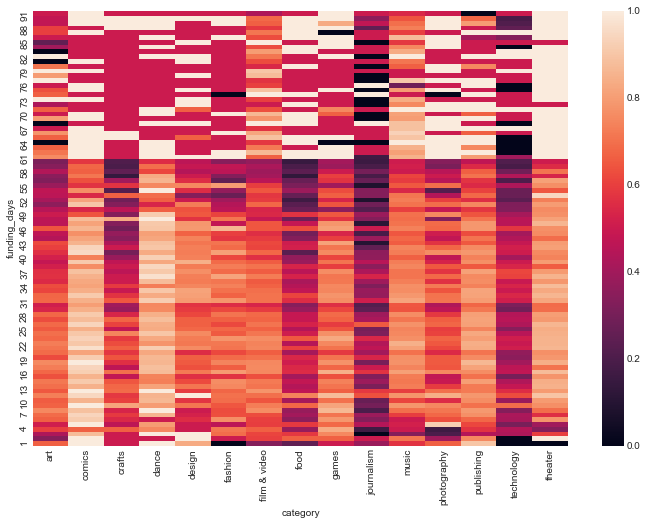

In [153]:
plt.subplots(figsize=(12,8))
ax = sns.heatmap(df.pivot_table(values='launch_state', columns='category', index='funding_days', 
                                fill_value=0.5), xticklabels=True)
ax.invert_yaxis()

In [332]:
# We see that some categories clearly do better than others.

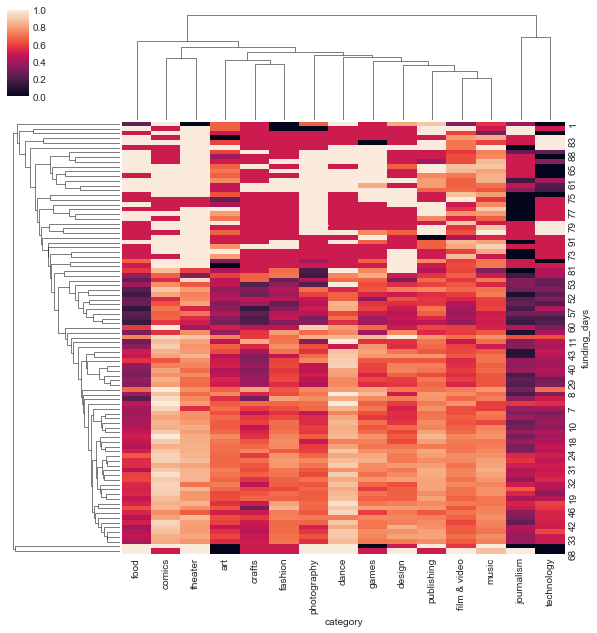

In [133]:
sns.clustermap(df.pivot_table(values='launch_state', columns='category', index='funding_days', fill_value=0.5))

In [134]:
# As already seen, there's not a lot of clustering to be done with funding_days. However, there is some clear clustering with the categories, eg journalism and technology seem to not be very successful.